In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

In [87]:
df = pd.read_csv("CollegePlacement.csv")

In [88]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [89]:
df.shape

(10000, 10)

In [90]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [91]:
df.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

In [92]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [93]:
df['IQ']

0       107
1        97
2       109
3       122
4        96
       ... 
9995    119
9996     70
9997     89
9998    107
9999    109
Name: IQ, Length: 10000, dtype: int64

In [94]:
df['IQ'].describe()

count    10000.000000
mean        99.471800
std         15.053101
min         41.000000
25%         89.000000
50%         99.000000
75%        110.000000
max        158.000000
Name: IQ, dtype: float64

In [95]:
df.select_dtypes(include=['object'])

,College_ID,Internship_Experience,Placement
0,CLG0030,No,No
1,CLG0061,No,No
2,CLG0036,No,No
3,CLG0055,Yes,No
4,CLG0004,No,No
...,...,...,...
9995,CLG0021,No,Yes
9996,CLG0098,No,No
9997,CLG0066,Yes,No
9998,CLG0045,No,No


In [96]:
df['Internship_Experience'] = df['Internship_Experience'].map({
    "Yes": 1,
    "No": 0,
}).astype(int)

In [97]:
df['Placement'] = df['Placement'].map({
    "Yes": 1,
    "No": 0,
}).astype(int)

In [98]:
df = df.drop('College_ID',axis=1)

In [99]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0,1
9996,70,9.25,9.34,7,0,0,7,2,0
9997,89,6.08,6.25,3,1,3,9,5,0
9998,107,8.77,8.92,3,0,7,5,1,0


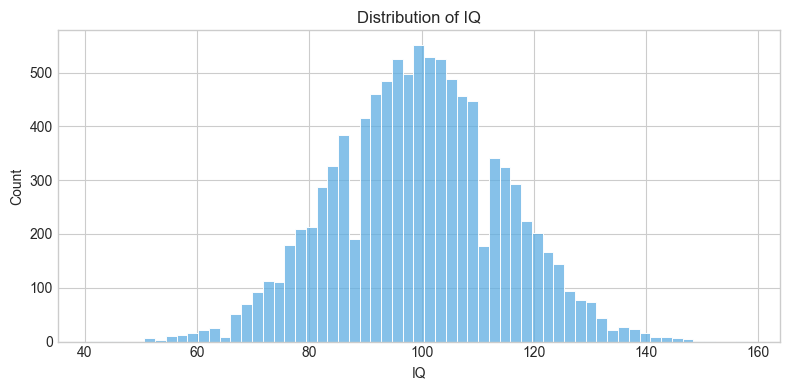

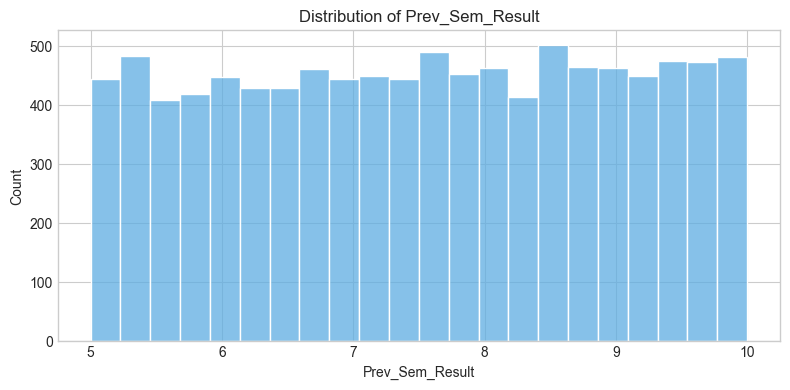

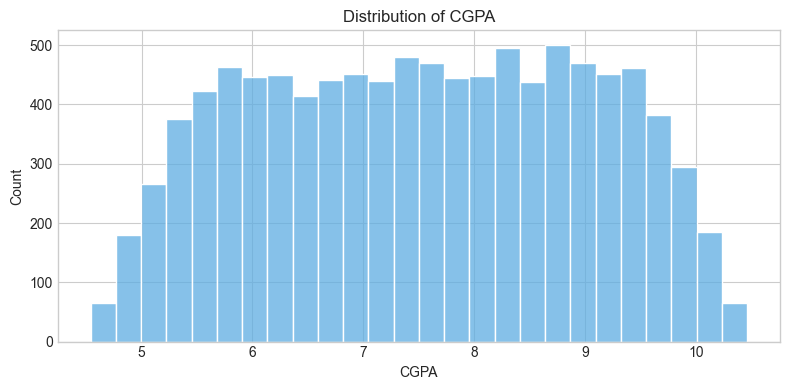

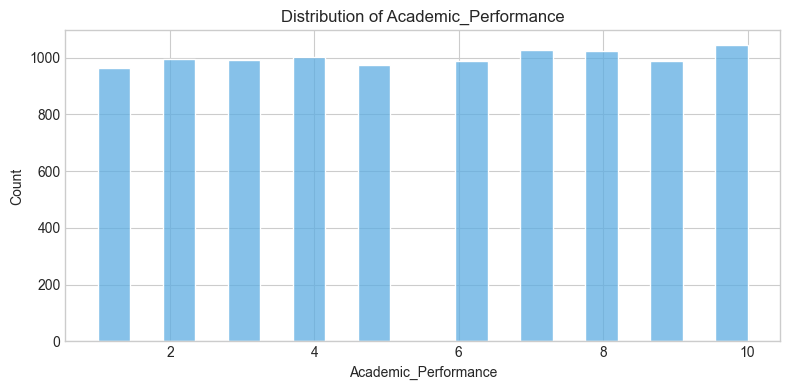

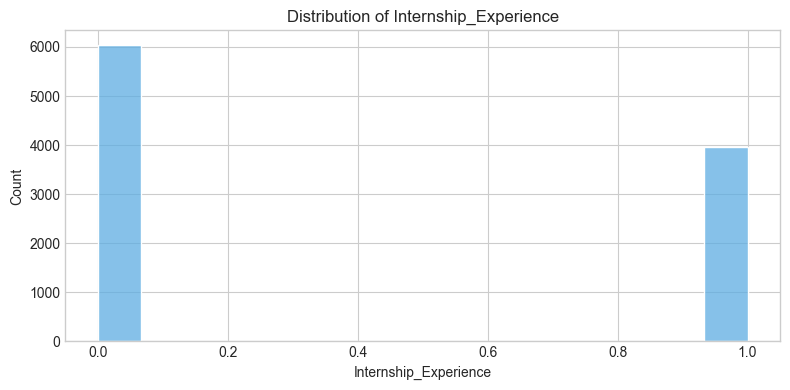

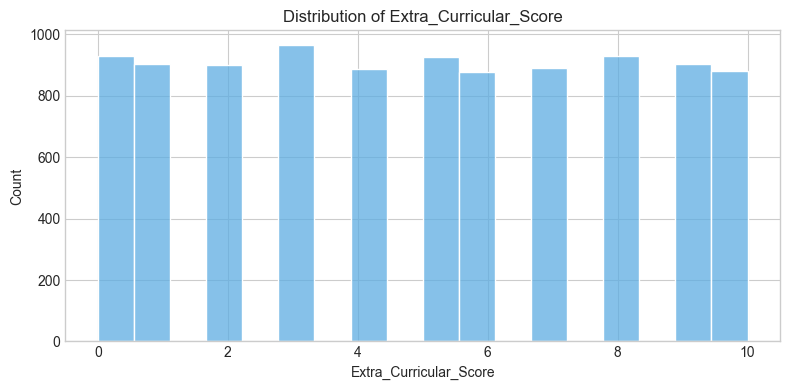

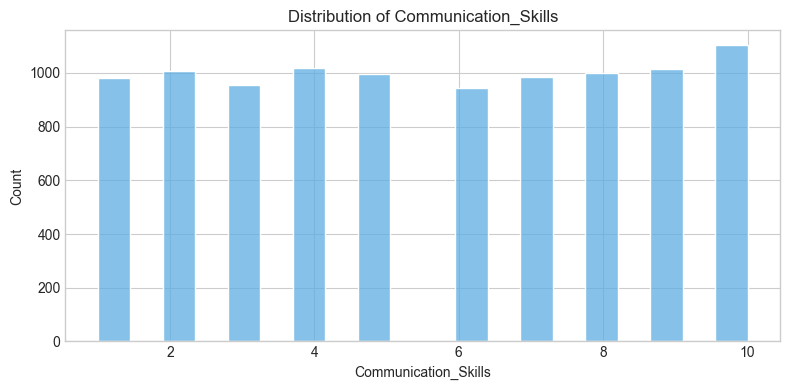

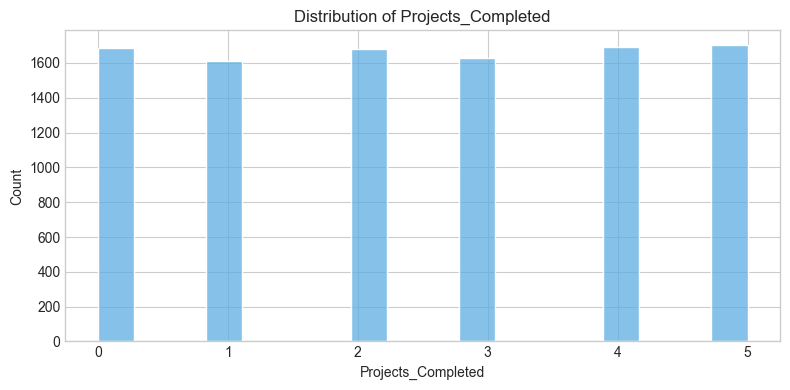

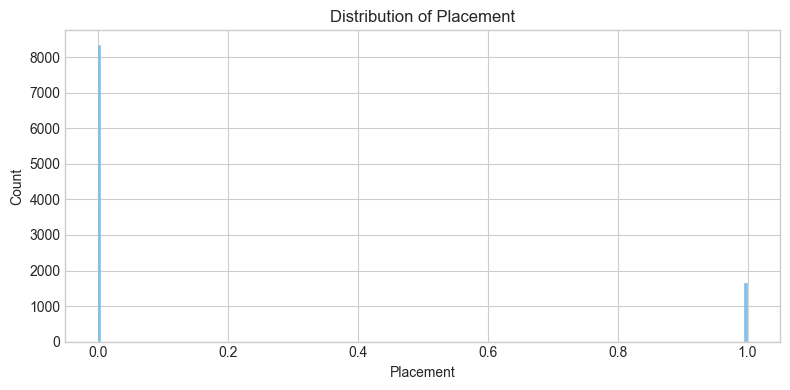

In [100]:
plt.style.use('seaborn-v0_8-whitegrid')

for cols in df.columns:
    if df[cols].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.histplot(x=df[cols], color='#5dade2')
        plt.title(f'Distribution of {cols}', fontsize=12)
        plt.xlabel(cols)
        plt.tight_layout()
        plt.show()

In [101]:
x = df.drop('Placement',axis=1)
y = df['Placement']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
model = LogisticRegression(max_iter=1000)

In [104]:
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [105]:
y_pred = model.predict(x_test)

In [106]:
accuracy_score(y_test, y_pred)*100

90.4

<Axes: >

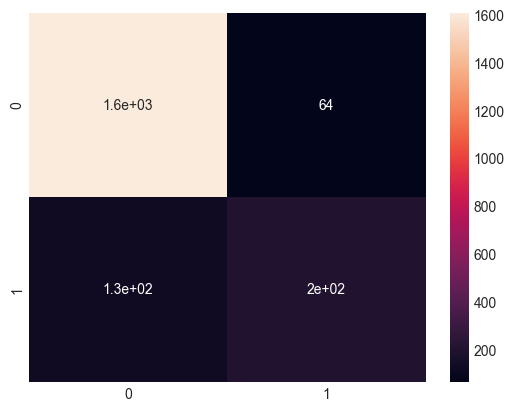

In [107]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [108]:
df.corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


<Axes: >

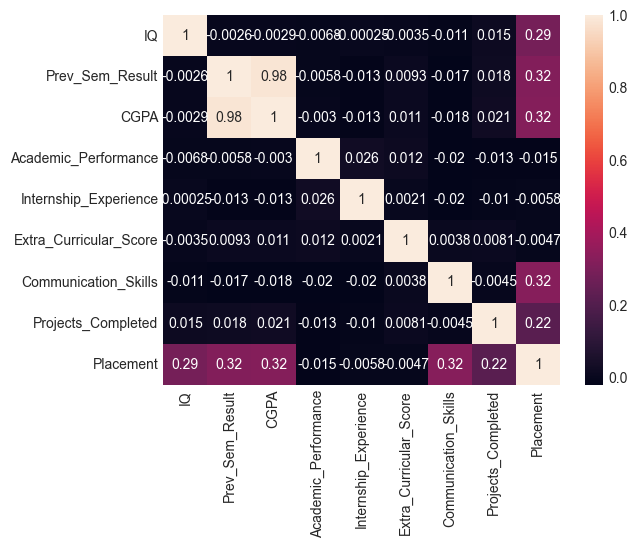

In [109]:
sns.heatmap(df.corr(), annot=True)

In [110]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

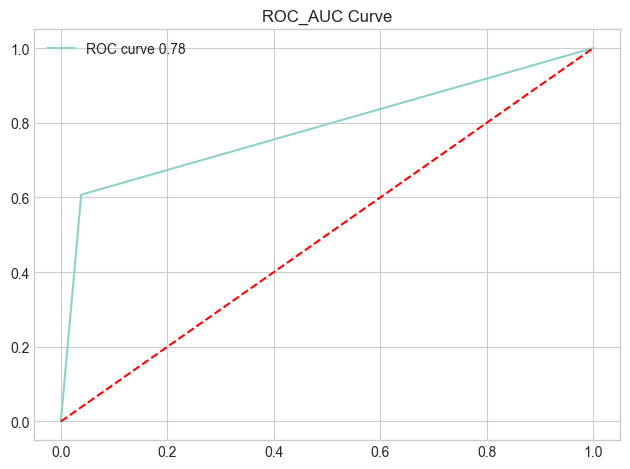

In [111]:
plt.figure()
plt.plot(fpr, tpr,label=f'ROC curve {auc:.2f}')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC_AUC Curve')
plt.tight_layout()
plt.legend()
plt.show()

In [123]:
accuracy_score(y_test, y_pred)*100

90.4

In [124]:
precision_score(y_test, y_pred)*100

75.57251908396947

In [125]:
recall_score(y_test, y_pred)*100

60.73619631901841

In [126]:
recall_score(y_test, y_pred, pos_label=0)*100

96.1768219832736

In [127]:
f1_score(y_test, y_pred)*100

67.3469387755102